In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
pic_name = "pics/test_photo.jpg"

In [8]:
pic_org = plt.imread(pic_name)
pic_org.shape

(3744, 5616, 3)

In [9]:
ins_hight = 2560
ins_width = 2048
ratio = ins_width * 2 / ins_hight

In [10]:
l = round(pic_org.shape[0] * ratio)

In [11]:
l_half = round(l/2)

In [12]:
canvas_left = np.full((pic_org.shape[0], l_half, 3), 255)
canvas_right = np.full((pic_org.shape[0], l_half, 3), 255)

In [13]:
split = round(pic_org.shape[1] / 2)

In [14]:
canvas_left[:, -split:, :] = pic_org[:, :split, :]
canvas_right[:, :split, :] = pic_org[:, split:, :]

canvas_left = canvas_left.astype(float) / 255
canvas_right = canvas_right.astype(float) / 255

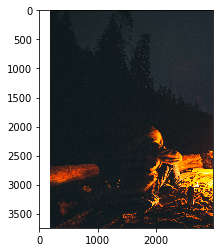

In [15]:
plt.imshow(canvas_left)

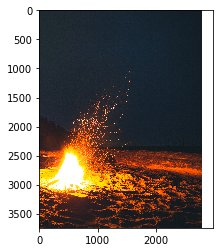

In [16]:
plt.imshow(canvas_right)

In [17]:
# make the 3rd pic
width_3 = pic_org.shape[1]
hight_3 = round(width_3 * (ins_hight / ins_width))
canvas_3 = np.full((hight_3, width_3, 3), 255)

split_2 = round((hight_3 - pic_org.shape[0])/2)

In [18]:
canvas_3[split_2:(split_2 + pic_org.shape[0]),:,:] = pic_org
canvas_3 = canvas_3.astype(float) / 255

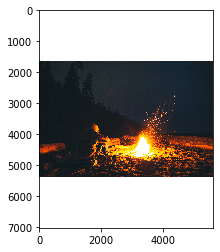

In [19]:
plt.imshow(canvas_3)

In [22]:
plt.imsave(("output/" + pic_name[5:-4] + '_left.jpg'), canvas_left)
plt.imsave(("output/" + pic_name[5:-4] + '_right.jpg'), canvas_right)
plt.imsave(("output/" + pic_name[5:-4] + '_centered.jpg'), canvas_3)